[Reference](https://medium.com/jungletronics/svm-credit-card-start-to-finished-75210d644dec)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 3.0 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [2]:
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls', header=1)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [4]:
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [18]:
df.rename({'default payment next month': 'DEFAULT'}, axis='columns', inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df.drop('ID', axis=1, inplace=True) 
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
df.dtypes

LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [20]:
print(df['SEX'].unique())

[2 1]


In [21]:
print(df['EDUCATION'].unique())

[2 1 3 5 4 6 0]


In [22]:
print(df['MARRIAGE'].unique())

[1 2 3 0]


In [23]:
len(df.loc[(df['EDUCATION'] == 0) | (df['MARRIAGE'] == 0)])

68

In [24]:
df_no_missing = df.loc[(df['EDUCATION'] != 0) & (df['MARRIAGE'] != 0)]
len(df_no_missing)

29932

In [25]:
(1 - ((30000-68)/30000))*100

0.2266666666666639

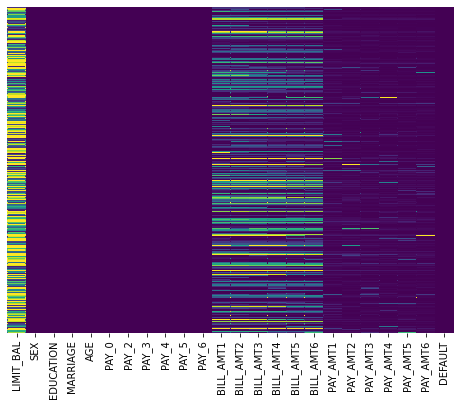

In [26]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(df_no_missing, yticklabels=False, cbar=False, robust=True,cmap='viridis')

In [27]:
print(df_no_missing['EDUCATION'].unique())
print(df_no_missing['MARRIAGE'].unique())

[2 1 3 5 4 6]
[1 2 3]


In [28]:
len(df_no_missing)

29932

In [29]:
df_no_missing.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [30]:
from sklearn.utils import resample
df_no_default = df_no_missing[df_no_missing['DEFAULT']==0]
df_no_default_downsampled = resample(df_no_default, replace=False, n_samples=1000, random_state=42 )
len(df_no_default_downsampled)

1000

In [31]:
from sklearn.utils import resample
df_default = df_no_missing[df_no_missing['DEFAULT']==1]
df_default_downsampled = resample(df_default, replace=False, n_samples=1000, random_state=42 )
len(df_default_downsampled)

1000

In [32]:
from sklearn.utils import resample
df_default = df_no_missing[df_no_missing['DEFAULT']==1]
df_default_downsampled = resample(df_default, replace=False, n_samples=1000, random_state=42 )
len(df_default_downsampled)

1000

In [33]:
df_downsample = pd.concat([df_no_default_downsampled, df_default_downsampled ])
len(df_downsample)

2000

In [34]:
X = df_downsample.drop('DEFAULT', axis=1).copy() 
# Alternatively:  X = df_dow.iloc[:, :-1].copy()
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
641,130000,2,3,1,28,0,0,0,0,-2,...,50000,0,0,0,2500,1000,0,0,0,0
4678,170000,1,3,1,29,0,0,0,0,0,...,172307,35234,32869,33862,7200,7500,1200,1200,1500,1300
16004,180000,2,2,1,29,0,0,0,0,0,...,26310,26662,26166,26176,1800,1800,1500,1056,950,1000
22974,210000,2,2,2,32,-2,-2,-2,-2,-2,...,410,0,0,0,979,412,0,0,0,0
17535,190000,2,3,1,45,0,0,0,0,0,...,80548,81778,83082,84811,3300,3331,3359,2663,2751,3000


In [35]:
y = df_downsample['DEFAULT'].copy()
y.head()

641      0
4678     0
16004    0
22974    0
17535    0
Name: DEFAULT, dtype: int64

In [36]:
X_encoded = pd.get_dummies(X, columns=['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])
X_encoded.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
641,130000,28,100143,50456,50000,0,0,0,2500,1000,...,0,1,0,0,0,0,0,0,0,0
4678,170000,29,165027,168990,172307,35234,32869,33862,7200,7500,...,0,0,0,1,0,0,0,0,0,0
16004,180000,29,25781,26000,26310,26662,26166,26176,1800,1800,...,0,0,0,1,0,0,0,0,0,0
22974,210000,32,355,975,410,0,0,0,979,412,...,0,1,0,0,0,0,0,0,0,0
17535,190000,45,76433,78472,80548,81778,83082,84811,3300,3331,...,0,0,0,1,0,0,0,0,0,0


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)
from sklearn.preprocessing import scale
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [38]:
from sklearn.svm import SVC
clf_svm = SVC(random_state = 42)
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


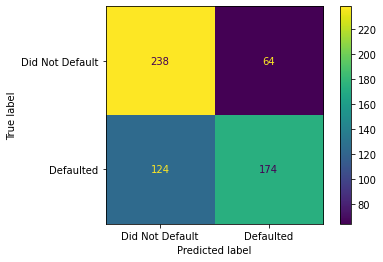

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf_svm, X_test_scaled, y_test, values_format='d', display_labels=['Did Not Default', 'Defaulted'])

In [40]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.5,0.1,1,10,100,1000], 'gamma':['scale', 1,0.1, 0.01,0.001,0.0001], 'kernel':['rbf']}
# we including C=1 and gamma = 'scale' cause these are default
# values;
# rbf = radial basis function, cause typically it gives us the best
# performance
# visit: Radial basis function 
# https://en.wikipedia.org/wiki/Radial_basis_function
optimal_params = GridSearchCV(SVC(), param_grid, cv = 5, scoring='accuracy', verbose=3)

In [41]:
optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END ....C=0.5, gamma=scale, kernel=rbf;, score=0.686 total time=   0.1s
[CV 2/5] END ....C=0.5, gamma=scale, kernel=rbf;, score=0.696 total time=   0.1s
[CV 3/5] END ....C=0.5, gamma=scale, kernel=rbf;, score=0.718 total time=   0.1s
[CV 4/5] END ....C=0.5, gamma=scale, kernel=rbf;, score=0.711 total time=   0.1s
[CV 5/5] END ....C=0.5, gamma=scale, kernel=rbf;, score=0.700 total time=   0.1s
[CV 1/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.525 total time=   0.1s
[CV 2/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.561 total time=   0.1s
[CV 3/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.536 total time=   0.2s
[CV 4/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.582 total time=   0.1s
[CV 5/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.554 total time=   0.1s
[CV 1/5] END ......C=0.5, gamma=0.1, kernel=rbf;, score=0.600 total time=   0.1s
[CV 2/5] END ......C=0.5, gamma=0.1, kernel=rbf

In [43]:
# Ideal value for C = .5, which mean we will use regularization, adn the ideal value for gamma = 0.01
clf_svm = SVC(random_state = 42, C=1, gamma=0.01)
clf_svm.fit(X_train_scaled, y_train)

SVC(C=1, gamma=0.01, random_state=42)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


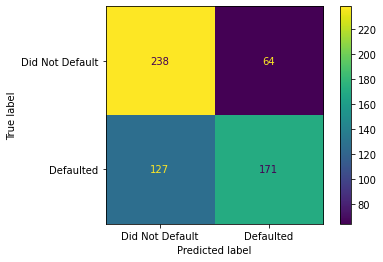

In [44]:
plot_confusion_matrix(clf_svm, X_test_scaled, y_test, values_format='d', display_labels=['Did Not Default', 'Defaulted'])

In [45]:
len(df_downsample.columns)

24

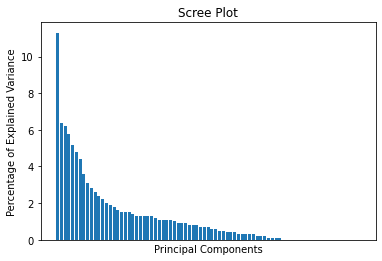

In [46]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = [str(x) for x in range(1, len(per_var)+1)]
plt.bar(x=range(1, len(per_var)+1), height=per_var)
plt.tick_params(axis='x', which = 'both', bottom=False, top=False, labelbottom=False)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

In [47]:
train_pc1_coords = X_train_pca[:, 0]
train_pc2_coords = X_train_pca[:, 1]
#Centering & Scaling
pca_train_scaled = scale(np.column_stack((train_pc1_coords, train_pc2_coords)))
param_grid = {'C':[0.5,0.1,1,10,100,1000], 'gamma':['scale', 1,0.1, 0.01,0.001,0.0001], 'kernel':['rbf']}
# we including C=1 and gamma = 'scale' cause these are default values;
# rbf = radial basis function, cause typically it gives us the best performance
# visit: Radial basis function https://en.wikipedia.org/wiki/Radial_basis_function
optimal_params = GridSearchCV(SVC(), param_grid, cv = 5, scoring='accuracy', verbose=3)
optimal_params.fit(pca_train_scaled, y_train)
print(optimal_params.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END ....C=0.5, gamma=scale, kernel=rbf;, score=0.650 total time=   0.4s
[CV 2/5] END ....C=0.5, gamma=scale, kernel=rbf;, score=0.629 total time=   0.2s
[CV 3/5] END ....C=0.5, gamma=scale, kernel=rbf;, score=0.696 total time=   0.2s
[CV 4/5] END ....C=0.5, gamma=scale, kernel=rbf;, score=0.629 total time=   0.2s
[CV 5/5] END ....C=0.5, gamma=scale, kernel=rbf;, score=0.671 total time=   0.2s
[CV 1/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.650 total time=   0.2s
[CV 2/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.636 total time=   0.1s
[CV 3/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.693 total time=   0.1s
[CV 4/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.632 total time=   0.1s
[CV 5/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.657 total time=   0.1s
[CV 1/5] END ......C=0.5, gamma=0.1, kernel=rbf;, score=0.643 total time=   0.2s
[CV 2/5] END ......C=0.5, gamma=0.1, kernel=rbf

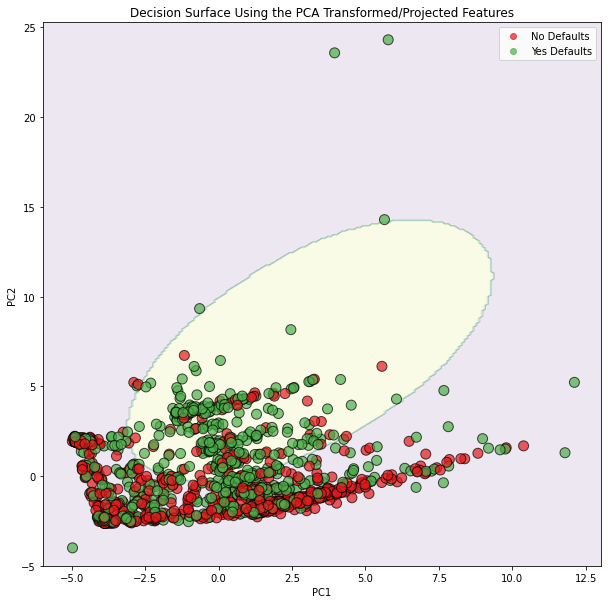

In [48]:
import matplotlib.colors as colors
clf_svm = SVC(random_state=42, C=1000, gamma=0.001)
clf_svm.fit(pca_train_scaled, y_train)
X_test_pca = pca.transform(X_train_scaled)
test_pc1_coords = X_test_pca[:, 0]
test_pc2_coords = X_test_pca[:, 1]
x_min = test_pc1_coords.min()-1
x_max = test_pc1_coords.max()+1
y_min = test_pc2_coords.min()-1
y_max = test_pc2_coords.max()+1
xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),np.arange(start=y_min, stop=y_max, step=0.1) )
Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))
Z = Z.reshape(xx.shape)
fig, ax = plt.subplots(figsize=(10,10))
ax.contourf(xx,yy, Z, alpha=0.1)
cmap = colors.ListedColormap(['#e41a1c', '#4daf4a'])
scatter = ax.scatter(test_pc1_coords, test_pc2_coords, c=y_train, cmap=cmap, s=100, edgecolors='k', alpha=0.7)
legend = ax.legend(scatter.legend_elements()[0], scatter.legend_elements()[1], loc='upper right')
legend.get_texts()[0].set_text('No Defaults')
legend.get_texts()[1].set_text('Yes Defaults')
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Decision Surface Using the PCA Transformed/Projected Features')
#plt.savefig('svm_defaults.png)
plt.show()